# IDENTIFICATION OF FRAUDULENT CREDIT CARD TRANSACTIONS

**DATA**

The datset is obtained from Kaggele. The key aspect is to use machine learning models to recognize fraudulent credit card transactions so as to ensure the customer is not charged for fraudulent purshases.

**IMPORTING ALL THE NECESSARY LIBRARIES**

In [2]:
# import all packages and libraries necessary for implementation

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

**LOAD AND VIEW THE DATASET**

In [3]:
# load the dataset obtained from kaggle

data = pd.read_csv(r'C:\Users\Nandhitha\Desktop\creditcardfraud\creditcard.csv')
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape 
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

**IDENTIFICATION OF IMBALANCES IN DATA**

In [5]:
# Determination of number of fraudulent cases

fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
# specifications of fradulent transactions

print(fraud.Amount.describe)

<bound method NDFrame.describe of 541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64>


In [7]:
# specifications of valid transactions

print(valid.Amount.describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


**PLOT OF CORELATION MATRIX**

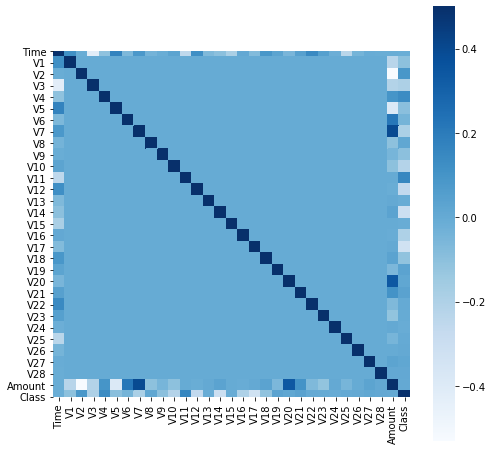

In [20]:
# Plotting of correlation matrix 

matrix = data.corr() 
fig = plt.figure(figsize = (8, 8)) 
sns.heatmap(matrix, vmax = 0.5, square = True, cmap="Blues") 
plt.show()

**TESTING AND TRAINING OF DATA**

In [9]:
# dividing X and Y 

X = data.drop(['Class'], axis = 1) 
Y = data["Class"]

print(X.shape) 
print(Y.shape) 

xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [10]:
# Splitting of data into training and testing sets using Skicit-learn

from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42) 

**BUILDING RANDOM FOREST MODEL**

In [12]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
yPred = rfc.predict(xTest) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
# Evaluation of classifier

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
accuracy = accuracy_score(yTest, yPred) 
print("The accuracy of the classifier is {}\n".format(accuracy)) 
precision = precision_score(yTest, yPred) 
print("The precision calculation is {}\n".format(precision)) 
recall = recall_score(yTest, yPred) 
print("The recall value is {}\n".format(recall)) 
mcc = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}\n".format(mcc))
f1 = f1_score(yTest, yPred) 
print("The F1-Score is for the model is {}\n".format(f1)) 

The accuracy of the classifier is 0.9995435553526912

The precision calculation is 0.9736842105263158

The recall value is 0.7551020408163265

The Matthews correlation coefficient is0.8572503300661733

The F1-Score is for the model is 0.8505747126436782



**VISUALIZATION OF CONFUSION MATRIX**

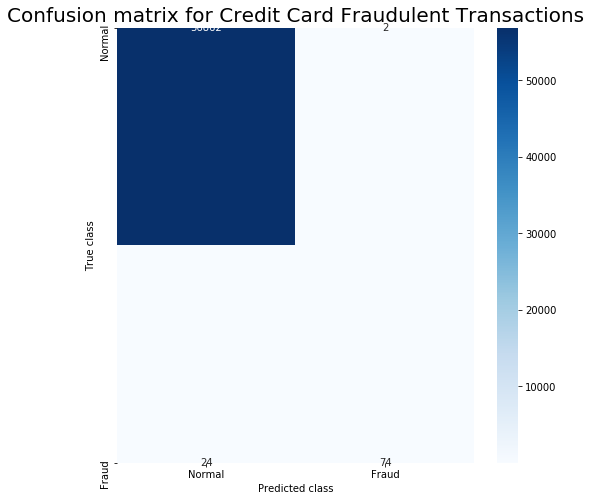

In [16]:
# Computation of confusion matrix 

label = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(8, 8)) 
sns.heatmap(conf_matrix, xticklabels = label, yticklabels = label, annot = True, fmt ="d",cmap="Blues")

plt.title("Confusion matrix for Credit Card Fraudulent Transactions", size="20") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

**CONCLUSION:**

**Using the random forest classifier, we can achieve a good recall value and also achieve maximum accuracy rate**